# Analysis of testData1

**Author**: Jacopo Ventura

**Date**: 23rd October 2017

A predictive model for the feature $t$ is build through the following steps:

1. import data and perform descriptive statistics
2. first plots of the data to get insights
3. check linear correlation
4. separate training and test sets
5. train few machine learning algorithms and select the best one 
6. outliers removal
7. train again the chosen machine learning algorithm without outliers
8. test the algorithm on the test dataset


In [2]:
# Import packages for data analysis
import os    # OS module provides the interface with the operating system and allows to use it
import tarfile
from six.moves import urllib
import pandas as pd     # Pandas: python library for large data manipulation and analysis. 
                        # Dataset will be saved as Pands dataset
import numpy as np
import matplotlib.pyplot as plt

# this command is very important in Jupyter: figures must be showed directly in the notebook!!!
%matplotlib inline

# disable warnings
import warnings
warnings.filterwarnings("ignore")


# step 1: acquire dataset
data_path='C:/Users/jacopo/Desktop/schaeffler/testData1.csv'
dataset = pd.read_csv(data_path,sep=';')   # dataset as pandas dataset

print('Overview of the dataset: size of dataset and type of data:\n')
dataset.info()

Overview of the dataset: size of dataset and type of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
a    1000 non-null float64
b    1000 non-null float64
c    1000 non-null float64
d    1000 non-null float64
e    1000 non-null int64
f    1000 non-null int64
t    1000 non-null float64
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


### Step 1: descriptive statistics of data and first plots

We now get the first insights on data by performing descriptive statistics.

In [3]:
print('\nDescriptive statistics of the dataset:')
dataset.describe()


Descriptive statistics of the dataset:


,a,b,c,d,e,f,t
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,170.114480,50.820250,40.401890,170.888900,2.97300,3.475000,1655.800410
std,63.522191,29.370845,22.744745,76.082976,1.43399,2.275204,6895.224892
min,60.110000,0.010000,0.080000,40.070000,1.00000,0.000000,-30285.780000
25%,115.222500,25.272500,20.187500,104.355000,2.00000,2.000000,1555.400000
50%,169.555000,50.940000,39.910000,169.655000,3.00000,4.000000,2553.400000
75%,224.187500,76.440000,60.512500,239.712500,4.00000,5.000000,3873.347500
max,279.540000,99.960000,79.830000,299.940000,5.00000,7.000000,35408.820000


The dataset consists of 1000 instances composed by 6 attributes ( $a$ , $b$ , $c$, $d$, $e$, $f$ ) and the target attribute  $t$. Moreover, **the dataset is complete**, meaning that no missing data (NaN) are present.

The target feature $t$ is continuous numerical. Therefore, predicting $t$ is a **regression task**.

It is very imporant to observe that the features $e$ and $f$ are numerical discrete variables. We have no information if these features are categorical or numerical.

If numerical, features $e$ and $f$ are two order of magnitude lower than features $a$ and $d$.

t    1.000000
a    0.137218
d    0.019005
e    0.003264
f   -0.000855
b   -0.014048
c   -0.116489
Name: t, dtype: float64
Scatter matrix of data:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F202F9E240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F204135358>]], dtype=object)

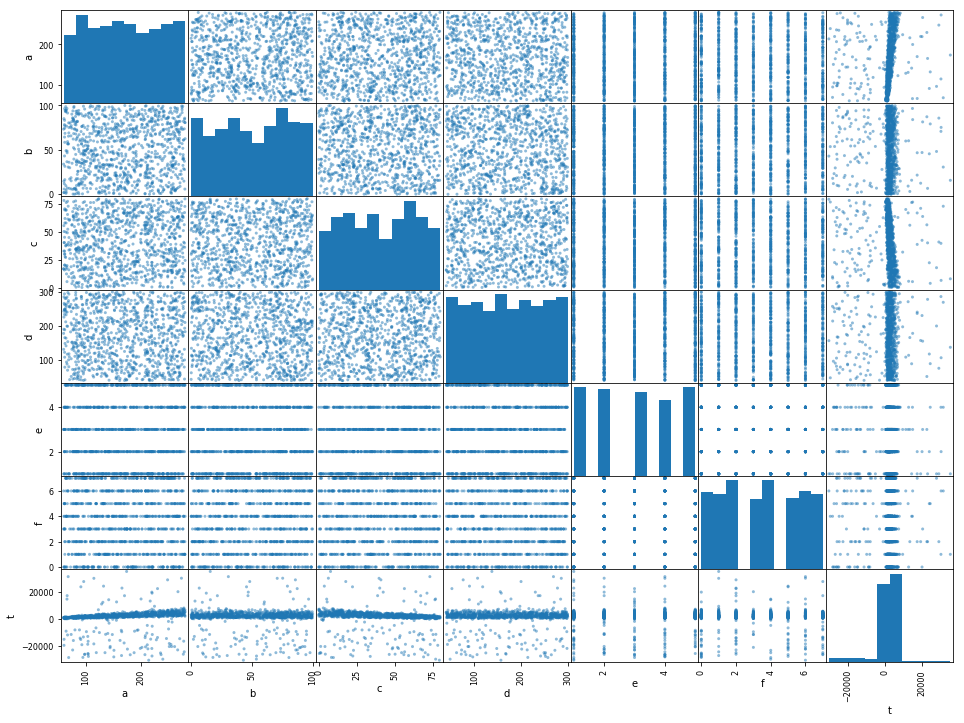

In [8]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

# check linear correlation through Pearson's r
corr_matrix = dataset.corr()
print(corr_matrix["t"].sort_values(ascending=False))

print('Scatter matrix of data:')
scatter_matrix(dataset, figsize=(16, 12))

Display correlation matrix


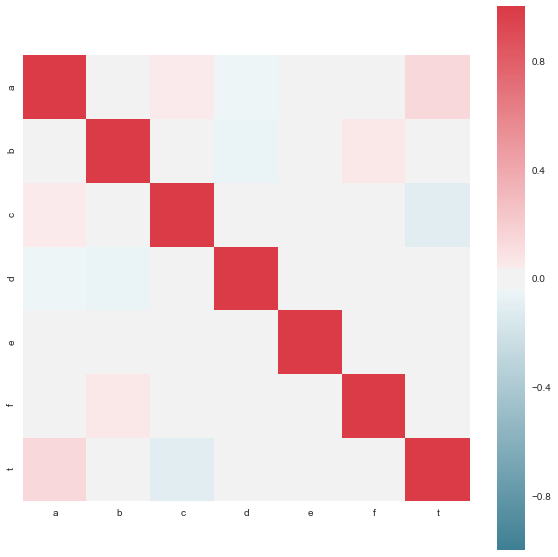

In [15]:
import seaborn as sns

print('Display correlation matrix')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, 
            mask=np.zeros_like(corr_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4).fit(dataset[['a','b','c','d']])

print('variance along the principal axes:')
print(pca.explained_variance_ratio_)

data_transformed = pca.transform(dataset[['a','b','c','d']])

variance along the principal xes:
[ 0.51883493  0.35849238  0.07665484  0.04601785]


Histograms show that the independent variables have uniform distribution. No correlations between independent variables are found.

### Step 2: separate test and training datasets

From the original dataset, training and test datasets are created. Test data is 20% of the original dataset (random sampling).

In [9]:
# Generation of train and test dataset by random sampling
from sklearn.cross_validation import train_test_split
 
Features_X = dataset[['a','b','c','d','e','f']]
Label_Y = dataset['t']
train_Features, test_Features, train_Label, test_Label = train_test_split(Features_X, 
                                                                            Label_Y, 
                                                                            test_size=0.2,
                                                                            random_state=42)

print(len(train_Features), "train +", len(test_Features), "test")

800 train + 200 test


D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_Feature = MinMaxScaler().fit(train_Features)
scaler_Label = MinMaxScaler().fit(train_Label)

train_Features_scaled = scaler_Feature.transform(train_Features)
train_Label_scaled = scaler_Label.transform(train_Label)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### Step 4: training of Machine Learning models

The following Machine Learning models are trained:

1. Linear regression
2. SVM
3. Random Forest
4. kNN


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# options for cross validation
score_cross_val = "neg_mean_squared_error"
N_split = 10

# function to display results from cross validation
def display_scores(scores):
    print('Performance measure for cross validation: mean squared error')
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [12]:
# 1: Linear regression
from sklearn.linear_model import LinearRegression

# train linear regression
lin_reg = LinearRegression()
lin_reg.fit(train_Features, train_Label)

# cross validation on the training dataset
scores = cross_val_score(lin_reg,train_Features,
                         train_Label,
                         scoring=score_cross_val, 
                         cv=N_split)

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Performance measure for cross validation: mean squared error
Mean: 6648.43860599
Standard deviation: 1064.14230876


In [13]:
# 3: Random Forest
from sklearn.ensemble import RandomForestRegressor

# train Random Forest
forest_reg = RandomForestRegressor(n_estimators = 50,
                                   max_depth=None,   
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   bootstrap=True
                                  )


forest_reg.fit(train_Features, train_Label)


# cross validation on the training dataset
scores = cross_val_score(forest_reg,train_Features,
                         train_Label,
                         scoring=score_cross_val, 
                         cv=N_split)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Performance measure for cross validation: mean squared error
Mean: 7040.08432458
Standard deviation: 848.079689806


In [ ]:
from sklearn import preprocessing
MinMax_features = preprocessing.MinMaxScaler().fit(train_Features.values)
MinMax_label = preprocessing.MinMaxScaler().fit(train_Label.values)

train_Features_scaled = MinMax_features.transform(train_Features.values)
train_Label_scaled = MinMax_label.transform(train_Label.values)


# Support Vector Machine
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(svr_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)


# 2: Decision Tree
from sklearn.tree import DecisionTreeRegressor

# train decision tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(tree_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)


# 1: Linear regression
from sklearn.linear_model import LinearRegression

# train linear regression
lin_reg = LinearRegression()
lin_reg.fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(lin_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)
